In [1]:
%matplotlib inline
import seaborn as sns
from data_pipeline import get_handcrafted_raw_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import AA_NAMES, plot_violin, plot_distribution, aminoacid_corr_heatmap, densities_joy_plot

In [2]:
train, test, class_dict = get_handcrafted_raw_data()
class_dict_inv = {v: k for k, v in class_dict.items()}
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
df_train_dummy = pd.get_dummies(df_train, columns=['class'])

Max sequence lenght test: 1876
Max sequence length: 13100
Class balance: Counter({2: 3314, 0: 3004, 3: 1605, 1: 1299})
Class balance: Counter({None: 20})


# Features analysis

## Sequence length

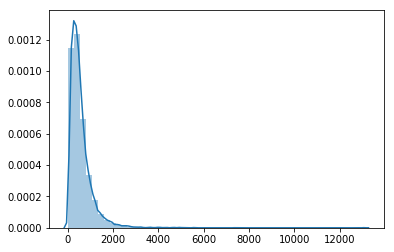

In [3]:
plot_distribution(train, 'seq_len');

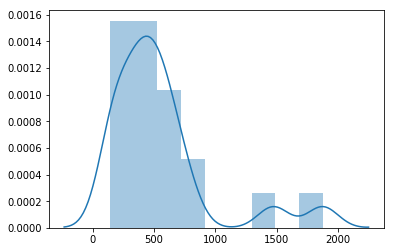

In [4]:
plot_distribution(test, 'seq_len');

The sequence length rarely exceeds 2000.

## Molecular weight

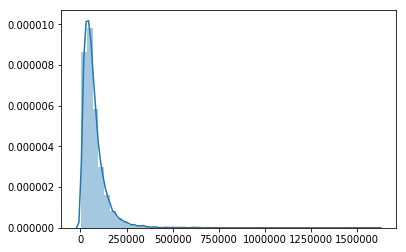

In [5]:
plot_distribution(train, 'molecular_weight');

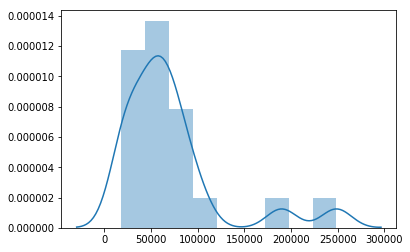

In [6]:
plot_distribution(test, 'molecular_weight');

The distributions look similar to the sequence length ones. The sequence length and the molecular weights are highly correlated.

## Class-related sequence length

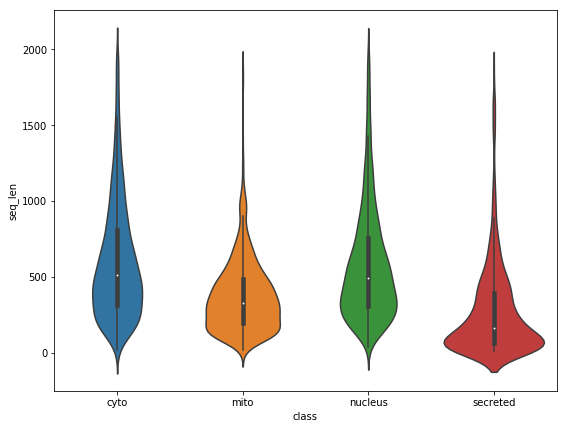

In [7]:
plot_violin(df_train, class_dict, 'seq_len', 2000)

## Class-related molecular weight

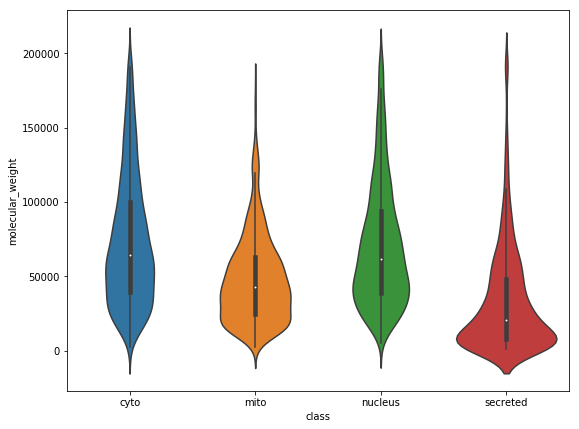

In [8]:
plot_violin(df_train, class_dict, 'molecular_weight', 200000)

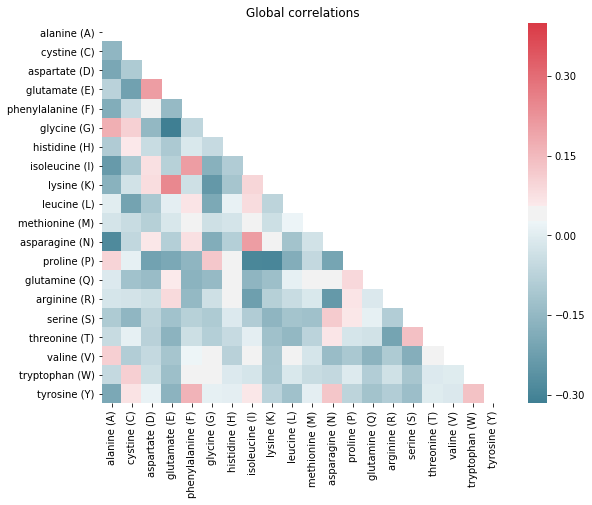

In [9]:
aminoacid_corr_heatmap(df_train, 'global_rel_', title='Global correlations')

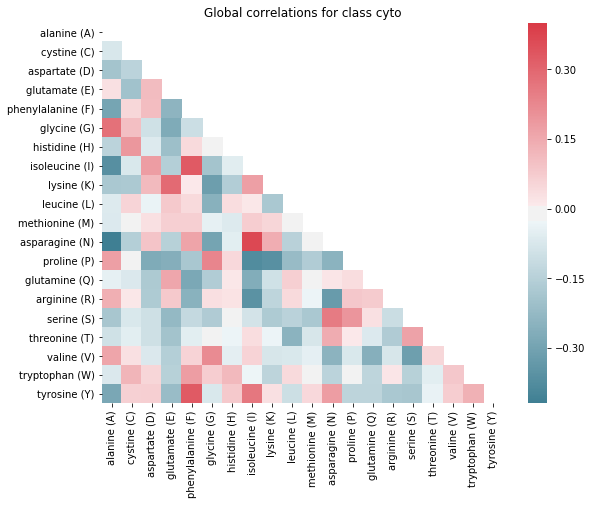

In [10]:
aminoacid_corr_heatmap(df_train_dummy[df_train_dummy['class_0'] == 1],
                       'global_rel_',
                       title='Global correlations for class {}'.format(class_dict_inv[0]))

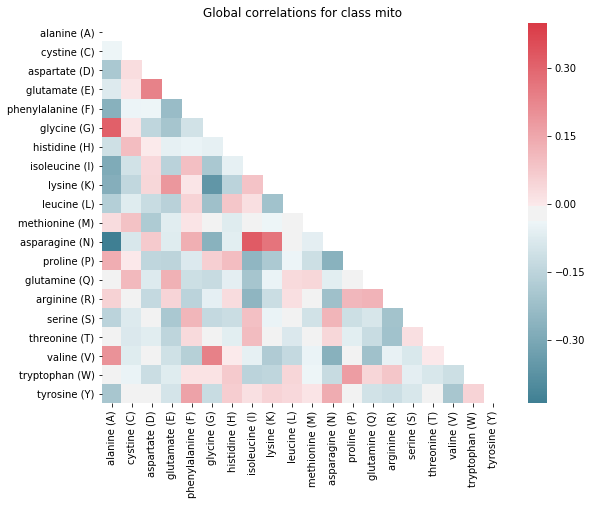

In [11]:
aminoacid_corr_heatmap(df_train_dummy[df_train_dummy['class_1'] == 1],
                       'global_rel_',
                        title='Global correlations for class {}'.format(class_dict_inv[1]))

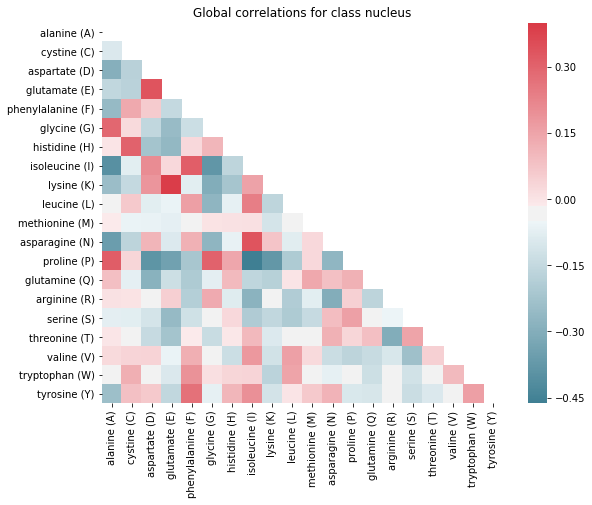

In [12]:
aminoacid_corr_heatmap(df_train_dummy[df_train_dummy['class_2'] == 1],
                       'global_rel_',
                       title='Global correlations for class {}'.format(class_dict_inv[2]))

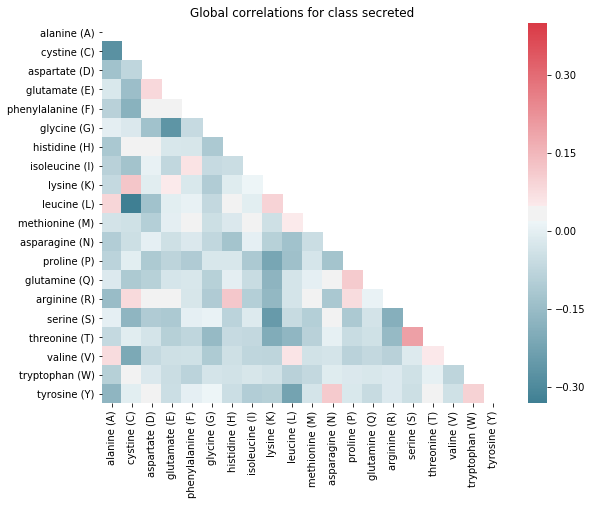

In [13]:
aminoacid_corr_heatmap(df_train_dummy[df_train_dummy['class_3'] == 1],
                       'global_rel_',
                       title='Global correlations for class {}'.format(class_dict_inv[3]))

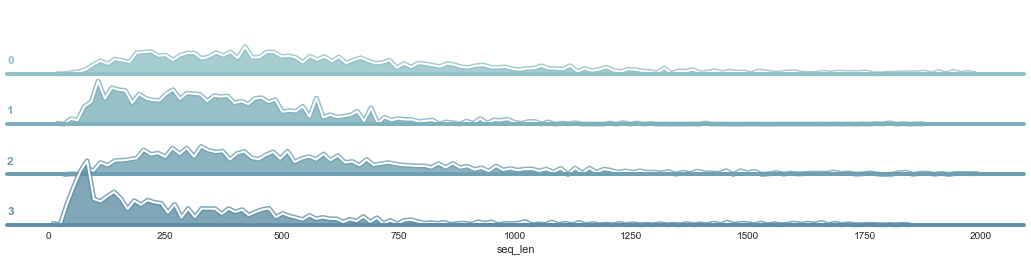

In [14]:
densities_joy_plot(df_train, class_dict_inv, 'seq_len', 2000)